In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
x = fits.open("fieldA_dbordenave_1.fit")
ra=x[1].data.field('ra')
dec=x[1].data.field('dec')
r=x[1].data.field('r')
x.close()


In [4]:
#masks
b_mask=np.where((r>20.00)&(r<=20.66))
g_mask=np.where((r>20.66)&(r<=21.33))
r_mask=np.where((r>21.33)&(r<=22.00))

#bins
ra_range=np.ceil(ra.max()-ra.min())             #rounded up number of degrees for 
dec_range=np.ceil(dec.max()-dec.min())          # RA and DEC 

ra_bins=ra_range*2.0                            #Approximate 0.5 X 0.5 degree binning
dec_bins=dec_range*2.0

#binning stars with 'r,g,b' masking
B_stars,xe,xy=np.histogram2d(ra[b_mask],dec[b_mask],bins=(ra_bins,dec_bins))
G_stars,xe,xy=np.histogram2d(ra[g_mask],dec[g_mask],bins=(ra_bins,dec_bins))
R_stars,xe,xy=np.histogram2d(ra[r_mask],dec[r_mask],bins=(ra_bins,dec_bins))

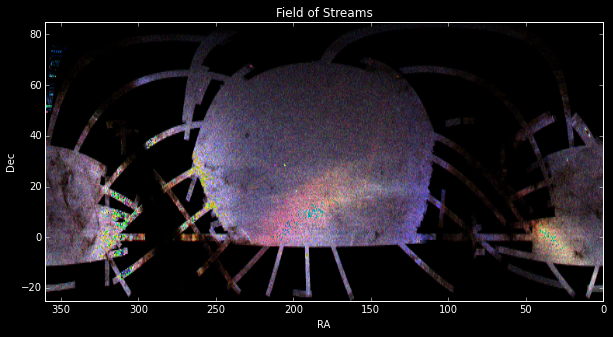

In [11]:
#Normalization of binned stars, with some arbitrary scaling factor for better visualization.
rgb_frame=np.dstack((R_stars.T*10.0/R_stars.max(),G_stars.T*10.0/G_stars.max(),B_stars.T*10.0/B_stars.max()))
#setting the axes of the imshow object.
ext=[ra.min(),ra.max(),dec.min(),dec.max()]

with plt.style.context(('dark_background')):
    fig,ax=plt.subplots()
    ax.set_xlim(ra.max(),ra.min())
    ax.set_title('Field of Streams')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')

    ax.imshow(rgb_frame,extent=ext,aspect='auto', origin='lower')
    fig.set_size_inches(10,5)
    fig.savefig('field_of_streams.png',dpi=250)